In [1]:
import torch
import scipy.io as sio
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from torch.optim.lr_scheduler import StepLR

In [2]:
graph_data0 = sio.loadmat('graph0.mat')['graph0']

In [3]:
adj_matrix = graph_data0[0]
print(adj_matrix)
print(adj_matrix.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.01265823]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01265823 0.         0.        ]]
(512, 512)


In [4]:
# Find the indices of non-zero elements
non_zero_indices = np.nonzero(adj_matrix)

# Get the values of the non-zero elements
non_zero_values = adj_matrix[non_zero_indices]

# Get the count of non-zero elements
num_non_zero_elements = len(non_zero_indices[0])

# Print the indices and corresponding values of the non-zero elements
for idx, value in zip(zip(non_zero_indices[0], non_zero_indices[1]), non_zero_values):
    print(f"Index: {idx}, Value: {value}")

# Print the number of non-zero elements
print(f"Number of non-zero elements: {num_non_zero_elements}")

Index: (0, 30), Value: 0.189873417721519
Index: (0, 61), Value: 0.3860759493670886
Index: (1, 3), Value: 0.012658227848101266
Index: (1, 4), Value: 0.0189873417721519
Index: (1, 28), Value: 0.17088607594936708
Index: (1, 30), Value: 0.18354430379746836
Index: (3, 1), Value: 0.012658227848101266
Index: (4, 1), Value: 0.0189873417721519
Index: (4, 6), Value: 0.012658227848101266
Index: (4, 7), Value: 0.0189873417721519
Index: (4, 10), Value: 0.0379746835443038
Index: (4, 17), Value: 0.08227848101265822
Index: (4, 28), Value: 0.1518987341772152
Index: (6, 4), Value: 0.012658227848101266
Index: (7, 4), Value: 0.0189873417721519
Index: (7, 10), Value: 0.0189873417721519
Index: (8, 10), Value: 0.012658227848101266
Index: (10, 4), Value: 0.0379746835443038
Index: (10, 7), Value: 0.0189873417721519
Index: (10, 8), Value: 0.012658227848101266
Index: (10, 14), Value: 0.02531645569620253
Index: (10, 17), Value: 0.04430379746835443
Index: (11, 14), Value: 0.0189873417721519
Index: (12, 14), Value:

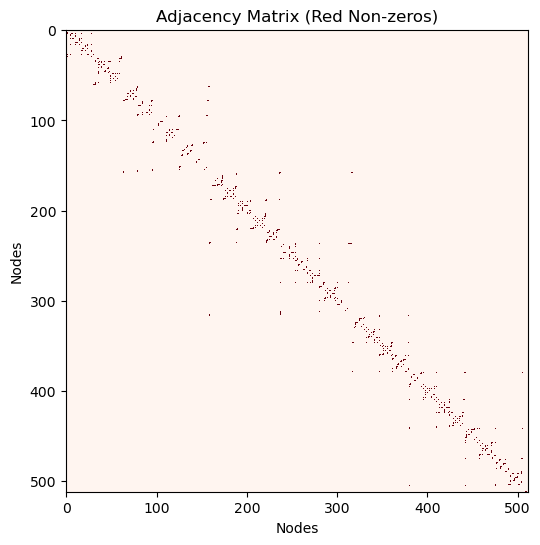

In [5]:
def show_nonzero_blocks(matrix: torch.Tensor, title="Non-zero Elements in Adjacency Matrix"):
    """
    Display non-zero elements in the adjacency matrix in red.
    """
    # Create a mask where non-zero values are True and zero values are False
    mask = matrix != 0  # Boolean matrix: True indicates non-zero
    
    # Plot the non-zero elements
    plt.figure(figsize=(6, 6))
    plt.imshow(mask.cpu(), cmap='Reds', interpolation='none')  # Use the 'Reds' colormap for non-zero values
    plt.title(title)
    plt.xlabel("Nodes")
    plt.ylabel("Nodes")
    plt.grid(False)
    plt.show()

adj_matrix = torch.tensor(graph_data0[0], dtype=torch.float32)  # Example: First graph from graph_data0

# Call the function to display non-zero elements in red
show_nonzero_blocks(adj_matrix, title="Adjacency Matrix (Red Non-zeros)")